In [1]:
# Install required libraries
!pip install scikit-learn nltk seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
categories = [
    'rec.sport.baseball',
    'rec.sport.hockey',
    'talk.politics.misc',
    'talk.politics.guns',
    'talk.politics.mideast'
]

newsgroups = fetch_20newsgroups(
    subset='all',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

data = newsgroups.data

# Convert to binary labels: 0 = Sport, 1 = Politics
labels = []
for t in newsgroups.target:
    if newsgroups.target_names[t].startswith('rec.sport'):
        labels.append(0)
    else:
        labels.append(1)

labels = np.array(labels)

print("Total Documents:", len(data))
print("Sports Documents:", sum(labels == 0))
print("Politics Documents:", sum(labels == 1))


Total Documents: 4618
Sports Documents: 1993
Politics Documents: 2625


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)


In [6]:
bow_vectorizer = CountVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


In [8]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

y_pred_nb = nb_model.predict(X_test_bow)

print("===== Bag of Words + Naive Bayes =====")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


===== Bag of Words + Naive Bayes =====
Accuracy: 0.9577922077922078
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       399
           1       0.94      0.99      0.96       525

    accuracy                           0.96       924
   macro avg       0.96      0.95      0.96       924
weighted avg       0.96      0.96      0.96       924



In [9]:
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [10]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)

print("===== TF-IDF + Logistic Regression =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


===== TF-IDF + Logistic Regression =====
Accuracy: 0.9491341991341992
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       399
           1       0.93      0.99      0.96       525

    accuracy                           0.95       924
   macro avg       0.96      0.94      0.95       924
weighted avg       0.95      0.95      0.95       924



In [11]:
tfidf_ngram = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),   # unigrams + bigrams
    max_features=8000
)

X_train_ngram = tfidf_ngram.fit_transform(X_train)
X_test_ngram = tfidf_ngram.transform(X_test)


In [12]:
svm_model = LinearSVC()
svm_model.fit(X_train_ngram, y_train)

y_pred_svm = svm_model.predict(X_test_ngram)

print("===== TF-IDF (1,2) + SVM =====")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


===== TF-IDF (1,2) + SVM =====
Accuracy: 0.9621212121212122
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       399
           1       0.95      0.98      0.97       525

    accuracy                           0.96       924
   macro avg       0.96      0.96      0.96       924
weighted avg       0.96      0.96      0.96       924



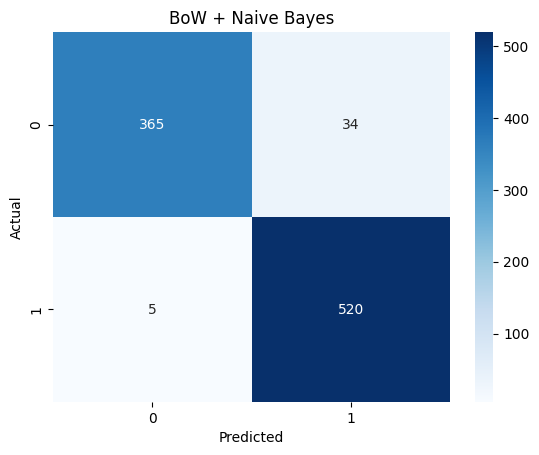

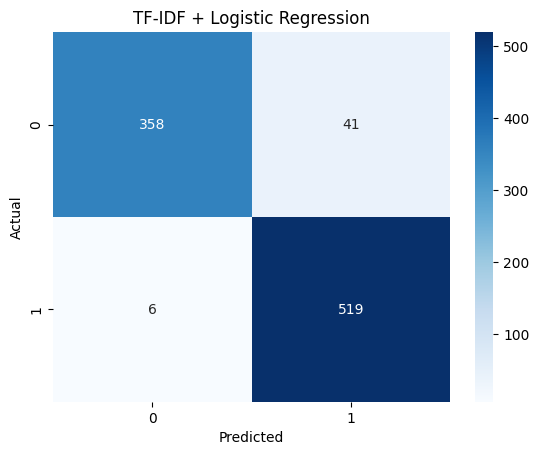

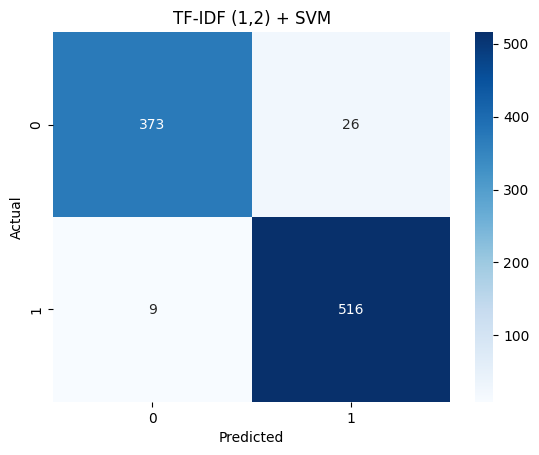

In [13]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_nb, "BoW + Naive Bayes")
plot_conf_matrix(y_test, y_pred_lr, "TF-IDF + Logistic Regression")
plot_conf_matrix(y_test, y_pred_svm, "TF-IDF (1,2) + SVM")
